In [1]:
# project: p6
# submitter: kfharrison
# partner: none
# hours: 6

In [2]:
import pandas as pd
import geopandas as gpd
import sqlite3

import sklearn.model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import rasterio
from rasterio.mask import mask
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
#Q1
#How many counties are in Wisconsin?
counties = gpd.read_file("counties.geojson")
len(counties)

72

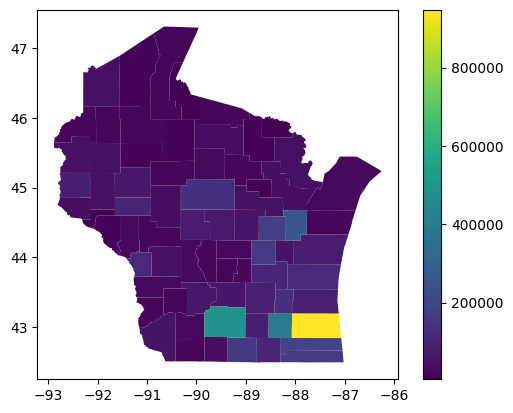

In [4]:
#Q2

# What is the population of each county in WI?
ax = counties.plot(column ="POP100",cmap = 'viridis',legend = True)









In [5]:
# Feature 1: AREALAND


con = sqlite3.connect("counties_tracts.db")
pd.read_sql("""SELECT * FROM sqlite_master""", con)

county_by_area = pd.read_sql("""SELECT * FROM counties""", con)

counties['AREALAND']= county_by_area['AREALAND']




sklearn.model_selection.train_test_split(counties,test_size=0.25,random_state=250)



[                  NAME  POP100  \
 32       Oneida County   35998   
 44       Forest County    9304   
 39        Green County   36842   
 1         Clark County   34690   
 12        Dodge County   88759   
 18    Marinette County   41749   
 13      Burnett County   15457   
 64        Brown County  248007   
 24         Polk County   44205   
 40   Green Lake County   19051   
 11  Fond du Lac County  101633   
 61      Calumet County   48971   
 20     Chippewa County   62415   
 31    Jefferson County   83686   
 46     Crawford County   16644   
 45    La Crosse County  114638   
 41       Pierce County   41019   
 55     Columbia County   56833   
 5       Buffalo County   13587   
 23     Walworth County  102228   
 36    Sheboygan County  115507   
 60      Lincoln County   28743   
 6     Winnebago County  166994   
 16      Shawano County   41949   
 7      Waukesha County  389891   
 43    Manitowoc County   81442   
 49       Oconto County   37660   
 0        Racine Cou

In [6]:
#Q3
#What are the counties in the test dataset?

train_data, test_data  = sklearn.model_selection.train_test_split(counties,test_size=0.25,random_state=250) #gives me a list of dataframes. 
#the list has 2 elemements,the Actual data and the test data
list(test_data["NAME"])



['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [7]:
#Q4
#How much variance in the POP100 can a LinearRegression model explain based only on AREALAND?



model = LinearRegression()
model.fit(train_data[["AREALAND"]], train_data["POP100"])   #X = data given to make predictions for y
y = model.predict(test_data[["AREALAND"]]) # TODO: use x values for new places
model.score(test_data[["AREALAND"]], test_data["POP100"])




0.016720430179409274

In [8]:
#Q5

#What is the predicted population of a county with 400 square miles of area, according to the model?

predict_df = pd.DataFrame({"AREALAND": [400*2.59*(10**3)**2]})
predict_df["predicted population"] = model.predict(predict_df)
float(predict_df["predicted population"])




90000.07422783462

In [9]:
hu100 = pd.read_sql("""SELECT COUNTY, SUM(HU100) FROM tracts GROUP BY COUNTY""", con)
hu100.to_sql("HU100", con, if_exists="replace", index=False)


combine = pd.read_sql("SELECT * FROM counties INNER JOIN hu100 ON counties.COUNTY = hu100.COUNTY", con)

counties["HU100"] = combine[ "SUM(HU100)"]
counties

,NAME,POP100,geometry,AREALAND,HU100
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739,82164
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070,15076
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751,34088
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584,8883
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413,36267
...,...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991,12979
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295,19204
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276,8868
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440,11120


In [10]:
#q6



train_data, test_data  = sklearn.model_selection.train_test_split(counties,test_size=0.25,random_state=250) #gives me a list of dataframes. 
#the list has 2 elemements,the Actual data and the test data
list(test_data["NAME"])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [11]:
#Q7 
#What are the HU100 values for the counties in the test dataset?

#taken from this wbsite: https://cmdlinetips.com/2021/04/convert-two-column-values-from-pandas-dataframe-to-a-dictionary/#:~:text=Another%20approach%20to%20convert%20two,all%20columns%20in%20the%20dataframe. 


pd.Series(test_data.HU100.values,index=test_data.NAME).to_dict()


{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [12]:
#Q8

# print("this is test_data",test_data)


model_2 = LinearRegression()
model_2.fit(train_data[["HU100"]], train_data["POP100"])   #X = data given to make predictions for y
y = model_2.predict(test_data[["HU100"]]) # TODO: use x values for new places
(model_2.score(test_data[["HU100"]], test_data["POP100"]))




error = sklearn.model_selection.cross_val_score(model_2, train_data[["HU100"]],train_data["POP100"])

var =  sum(error)/len(error)
var

0.9739348181232653

In [13]:
#Q9
error.std()

0.01693954236334351

In [14]:
#Q10

#What is the formula relating POP100 and HU100?


f"POP100 = {round(model_2.coef_[0], 2)}*HU100 + {round(model_2.intercept_, 2)}"

'POP100 = 2.47*HU100 + -9276.89'

Text(104371, 248007, 'Brown')

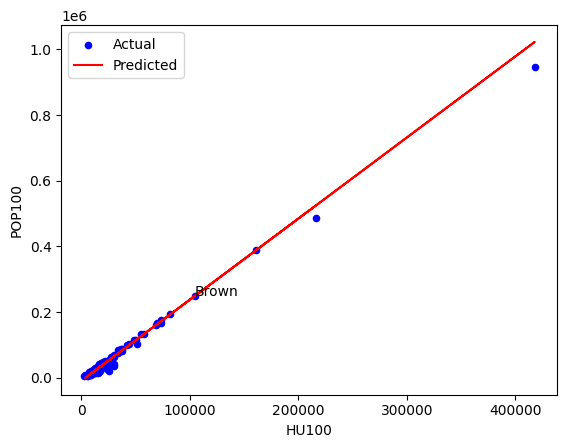

In [15]:
#Q11

#What is the relationship between HU100 and POP100, visually?



ax =counties.plot(x= "HU100",y="POP100",kind='scatter', color = "blue", label = "Actual")
#test_data.plot(x= "HU100",y="POP100",kind='scatter', ax=ax)



predict_df = pd.DataFrame(test_data)
predict_df["Predicted"] = model_2.predict(predict_df[["HU100"]])
predict_df


predict_df.plot.line(x="HU100", y="Predicted", color="r",ax=ax)


x_value =counties.loc[counties['NAME'] == "Brown County", 'HU100'].iloc[0]
y_value=counties.loc[counties['NAME'] == "Brown County", 'POP100'].iloc[0]


ax.text(x_value, y_value, "Brown") 

In [16]:
#Q12

A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

count = 0
for a in A.reshape(-1,1):
    if a>= 3 and a<= 6:
        count += 1
count

8

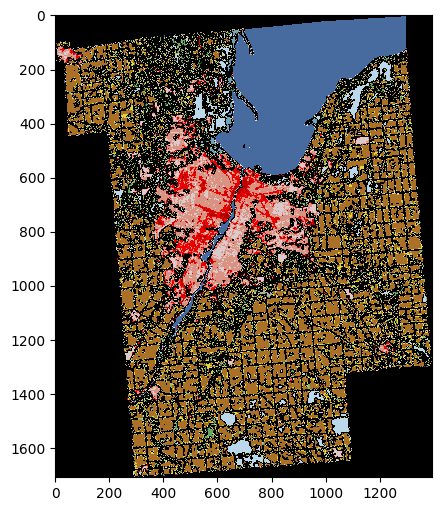

In [17]:
#Q13
#How does Brown County look?


c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

Brown = counties.loc[counties['NAME'] == "Brown County"]
land = rasterio.open("zip://../p6/land.zip!wi.tif")



matrix, _ = mask(land, Brown.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap =custom_cmap )

In [18]:
#What portion of Brown County is "Open Water"?
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}


In [19]:
#Q14

count_water = 0
for row in matrix == 11:
    for element in row:
        if element == True:
            count_water += 1
            
            
            
count_total = 0
for row in matrix:
    for el in row:
        if el != 0:
            count_total +=1
            

count_water/count_total 

0.13797526789725206

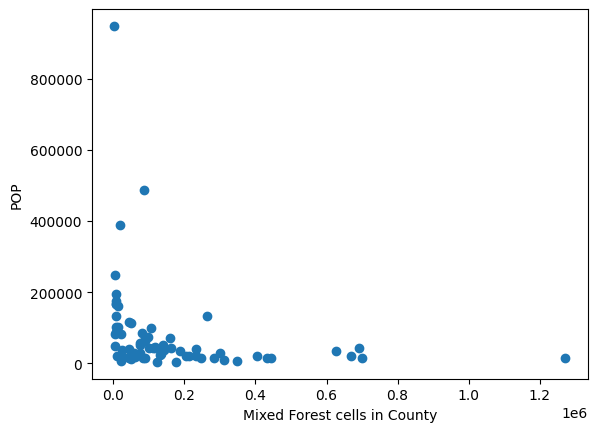

In [20]:
#Q15
#What is the Relationship Between POP100 and


lis_rows = []
x_values = []

#turns the dataframe into a list of rows
for county in counties["NAME"]:
    row = counties[counties["NAME"]==county]
    lis_rows.append(row)
    
#loops through rows and masks each one before appending them to a list
for county_row in lis_rows:
    matrix = mask(land, county_row.to_crs(land.crs)["geometry"], crop=True)[0]
    x_values.append((matrix==43).astype(int).sum())

y_values = counties["POP100"].values.tolist()


  
plt.scatter(x_values, y_values)

plt.ylabel("POP")
plt.xlabel("Mixed Forest cells in County")
plt.show()




In [21]:
# tractsdf = gpd.read_file("tracts.shp")

   
# lis_rows = [] 
  
# #turns my dataframe into a list of rows
# for county in tractsdf.index:
#     row = tractsdf[ tractsdf.index==county]
#     lis_rows.append(row)

    
# for value in lis_rows:
#     matrix = mask(land, value.to_crs(land.crs)["geometry"], crop=True)[0] #masks each row
#     for key in land_use:
#         tractsdf.at[value.index[0], key] = (matrix==land_use[key]).astype(int).sum()
    
    
    


# # add feature columns to that dataset for every key in land_use(found under q14), 
# # with the column value being the number of units present of that land type, based on raster data from lands.zip
# tractsdf
#split your GeoDataFrame into train/test using random_state=320
#Construct a regression model to predict POP100. Use all of the new columns you created in step 2 as the features for training.

#Write a comment discussing what the graph is showing you and how you might use that information in building your own model(Part 2).
#the graph is showing us which columns of data affect our population density the most. for instance _blank has a higher_ and therefore is weighted more heavaliy when predicting the POP100
# I can use this to pick out the most impactful columns when making my own model.

In [22]:
#Part 1:
# Q1 
tractsdf = gpd.read_file("tracts.shp")

                         
                         
lis_rows = [] 


# Q2
#turns my dataframe into a list of rows
for county in tractsdf.index:
    row = tractsdf[ tractsdf.index==county]
    lis_rows.append(row)

    
for value in lis_rows:
    matrix = mask(land, value.to_crs(land.crs)["geometry"], crop=True)[0] #masks each row
    for key in land_use:
        tractsdf.at[value.index[0], key] = (matrix==land_use[key]).astype(int).sum()
       

    
train_data, test_data  = sklearn.model_selection.train_test_split(tractsdf,test_size=0.25,random_state=320)
# Q3



column_names = list(land_use.keys())

# Q4
model = LinearRegression()
model.fit(train_data[column_names], train_data["POP100"])   #X = data given to make predictions for y
y = model.predict(test_data[column_names]) # TODO: use x values for new places
model.score(test_data[column_names], test_data["POP100"])



# Q5 the graph is showing us which columns of data affect our population density the most(ie the ones with the highest coefficent). 
#for instance developed_med has a coefficent and therefore is weighted more heavaliy when predicting the POP100
# I can use this to pick out the most impactful columns when making my own model.



0.44867285416657754

<AxesSubplot:xlabel='Features', ylabel='Coefficient'>

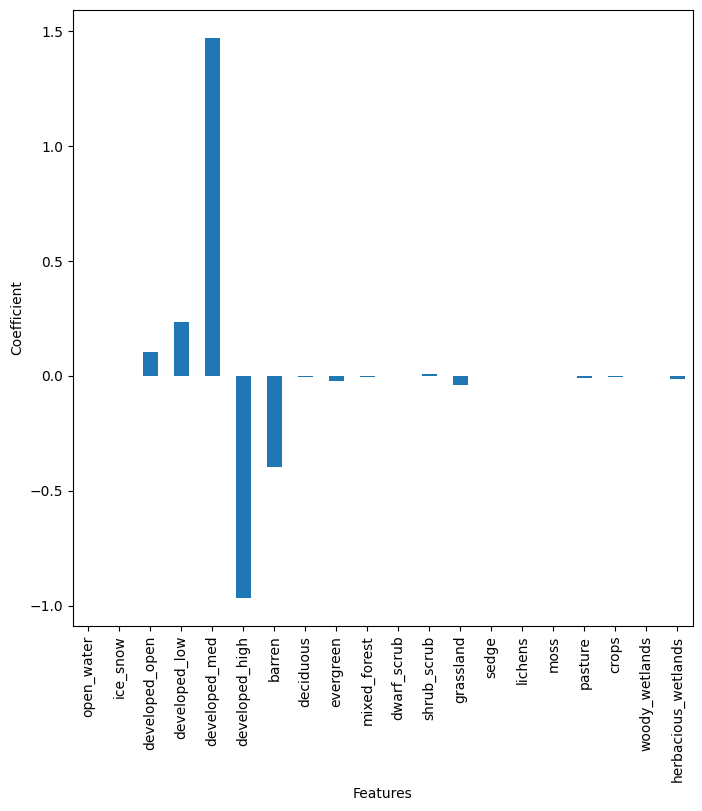

In [23]:
#Q16

#What features does your model rely on most?



#since our model has the highest coefficients for developed_open, developed_med, and developed_low, 
#these are the colukns our model relys most heavily on




importance = model.coef_

plt.ylabel("Coefficient")
plt.xlabel("Features")
ax = pd.Series(model.coef_, index=column_names).plot.bar(figsize=(8,8))

ax




model 1 score 0.3734068991172351
model 2 score 0.06785450434808793
model 1 std 0.036142711538878644
model 2 std 0.0176353554308826


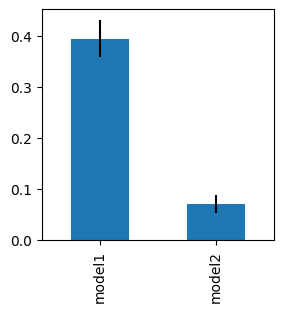

In [24]:
#Part 2

# Q1

model1 = LinearRegression()
model1.fit(train_data[["developed_open","developed_low","developed_med"]], train_data["POP100"])   #X = data given to make predictions for y
y = model1.predict(test_data[["developed_open","developed_low","developed_med"]]) # TODO: use x values for new places
print("model 1 score",model1.score(test_data[["developed_open","developed_low","developed_med"]], test_data["POP100"]))



model2 = LinearRegression()
model2.fit(train_data[["developed_high","barren","grassland"]], train_data["POP100"])   #X = data given to make predictions for y
y = model2.predict(test_data[["developed_high","barren","grassland"]]) # TODO: use x values for new places
print("model 2 score",model2.score(test_data[["developed_high","barren","grassland"]], test_data["POP100"]))



# Q2



model1_scores = cross_val_score(model1, tractsdf[["developed_open","developed_low","developed_med"]], tractsdf[["POP100"]])

model2_scores = cross_val_score(model2, tractsdf[["developed_high","barren","grassland"]], tractsdf[["POP100"]])


mean = pd.Series({"model1": model1_scores.mean(), "model2": model2_scores.mean()})
err = pd.Series({"model1": model1_scores.std(), "model2": model2_scores.std()})
mean.plot.bar(figsize=(3,3), yerr=err)


print("model 1 std", model1_scores.std())


print("model 2 std", model2_scores.std())



In [25]:
#Q17

# Q3 okay, even though model 1 has a larger std, I still think that it is the better model 
# because it's predicted score is almost 3 times as high as model 2

model2.fit(train_data[column_names], train_data["POP100"])   #X = data given to make predictions for y
y = model2.predict(test_data[column_names]) # TODO: use x values for new places
a = model2.score(test_data[column_names], test_data["POP100"])
float(a)

0.44867285416657754